## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, how='right')
# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
combine_data["Mouse ID"].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combine_data.loc[combine_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = combine_data.loc[combine_data["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data[combine_data['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice= clean_data["Mouse ID"].value_counts()
number_of_clean_mice = len(clean_mice)
number_of_clean_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

means = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems})
summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

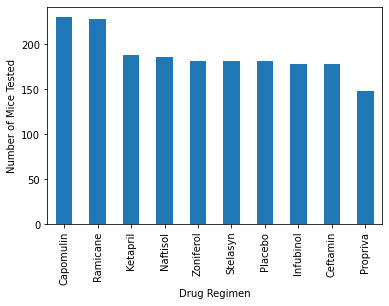

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = clean_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()


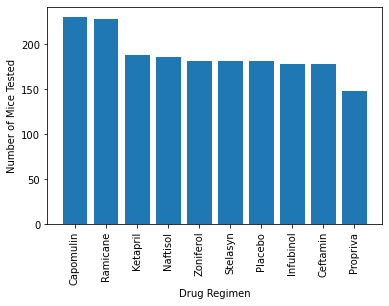

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = clean_data['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()



C:\Users\thill\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


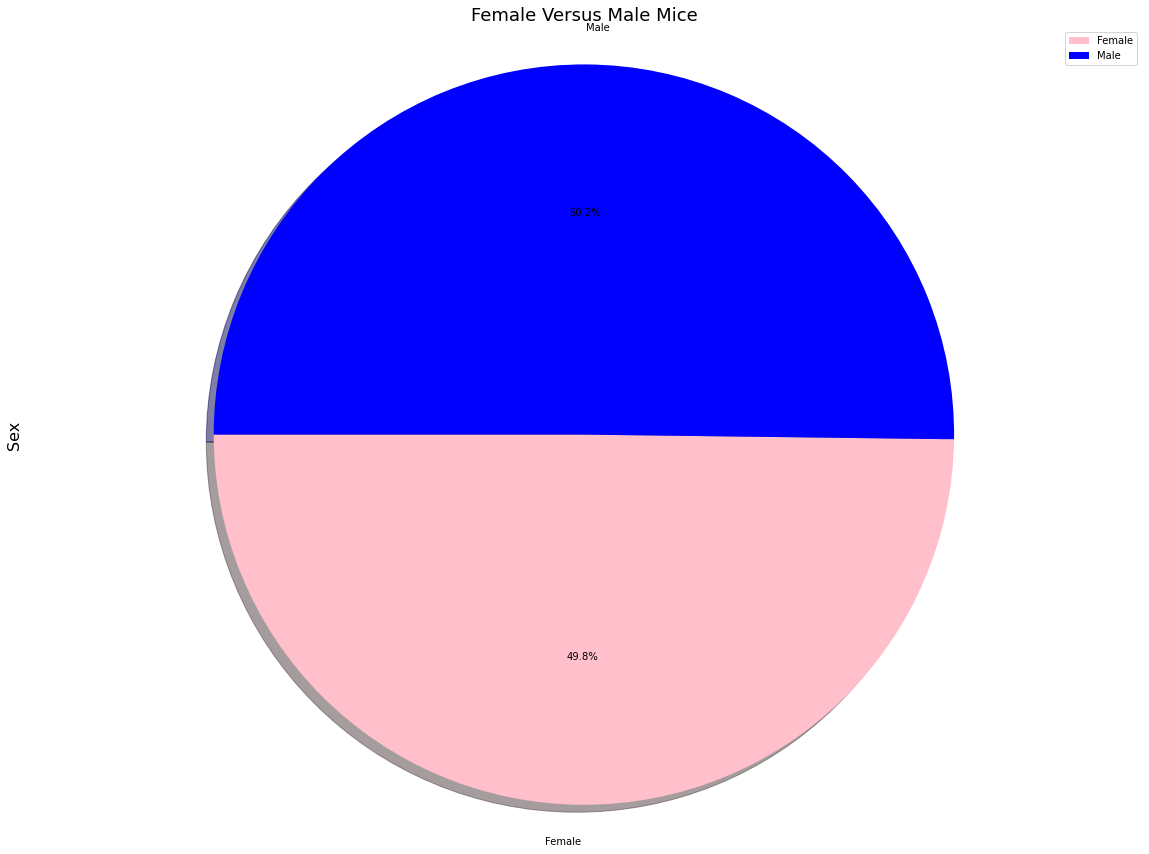

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_gender = combine_data.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

mice_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())

mice_gender.columns = ["Total"]

mice_gender["Gender Percentage"] = (100* (mice_gender["Total"]/mice_gender["Total"].sum()))


mice_gender



colors = ['pink', 'blue']
plot = mice_gender.plot.pie(y='Total',figsize=(20,15), colors= colors, startangle = 180, shadow = True, autopct ="%1.1f%%")
plt.title('Female Versus Male Mice', fontsize = 18)
plt.ylabel('Sex', fontsize = 16)
plt.axis ("equal", fontsize = 16)

plt.show()

C:\Users\thill\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


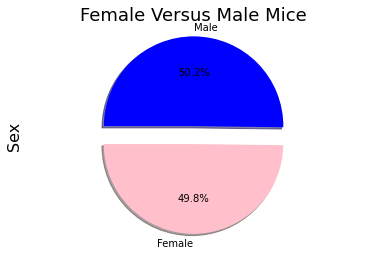

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]

sizes = [49.8,50.2]

colors = ['pink', 'blue']

explode = ( 0.2,0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct= "%1.1f%%", shadow = True, startangle = 180)

plt.title('Female Versus Male Mice', fontsize = 18)

plt.ylabel('Sex', fontsize = 16)

plt.axis ("equal", fontsize = 16)

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
best_regimes = combine_data[combine_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data


# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol =  best_regimes.loc[ best_regimes["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


    
  

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


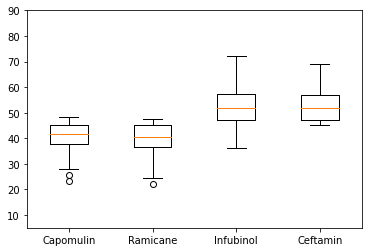

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


#Create a list to use as labels and dataframe
regimes_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimes_data.reset_index()
tumor_list = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_list)
tumor_list_df = tumor_list_df.reindex(regimes_list)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=regimes_list)
plt.ylim(5, 90)
plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data = combine_data.loc[combine_data["Drug Regimen"] == "Capomulin",:]

Capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0, 0.5, 'Tumor Volume (mm3)')

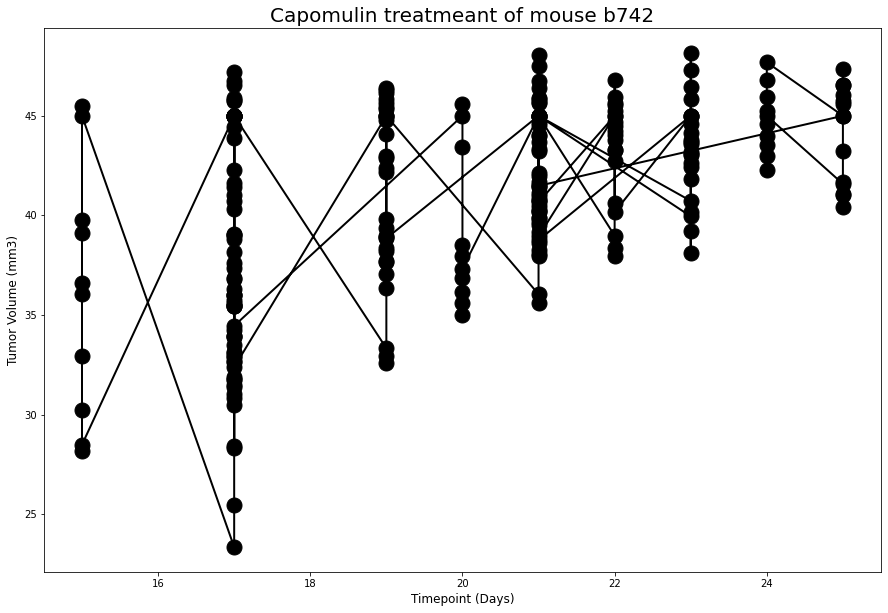

In [23]:
# # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# x_axis = Capomulin_data["Weight (g)"]
# avg_tumor_vol =Capomulin_data(['Tumor Volume (mm3)']).mean()

# # fig1, ax1 = plt.subplots(figsize=(15, 10))
# # plt.title('Capomulin Regimen Turmor Volume vs Weight',fontsize= 16)
# # plt.scatter(x_axis,avg_tumor_vol)
# # plt.xlabel('Weight (g)',fontsize =12)
# # plt.ylabel('Tumor Volume (mm3)',fontsize =12)

# # avg_tumor_vol.head()

x_axis = Capomulin_data["Weight (g)"]
avg_tumor_vol = Capomulin_data["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b742',fontsize =20)
plt.plot(x_axis, avg_tumor_vol,linewidth=2, markersize=15,marker="o",color="black")
plt.xlabel('Timepoint (Days)',fontsize =12)
plt.ylabel('Tumor Volume (mm3)',fontsize =12)


## Correlation and Regression

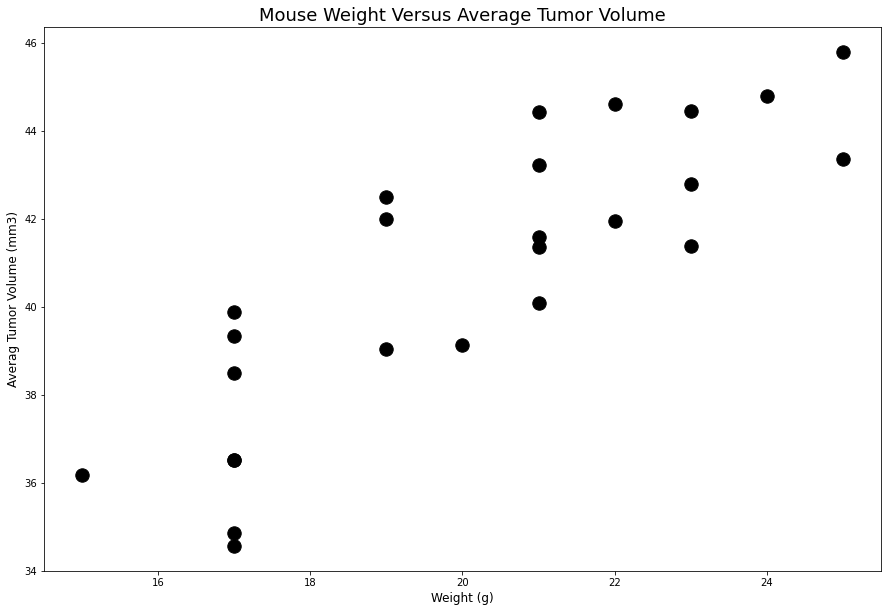

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_tumor_vol =Capomulin_data.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'],s=180, color="black")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =18)
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =12)


plt.show()